#  Clase 7: Analisis de datos y repaso de otras clases

Para seguir el contenido de este cuaderno [dar clic aquí](https://nbviewer.jupyter.org/github/camilogavo/EstadisticaR/blob/master/Clase7.ipynb)

Los ejercicios pueden ser reproducidos directamente en RStudio.

Para esta clase trabajaremos con los datos de precios de petroleo utilizando paquetes de Tidyverse:

* Cargar datos
* Inspeccion e identificacion de datos faltantes
* Imputacion de datos
* Cruces de tablas
* Agregacion de datos (Tablas dinamicas)
* Correlaciones
* Taller


In [193]:
library(tidyverse) #Es una opcion para leer, organizar, transformar y graficar

In [194]:
# Serie Brent: Los datos tienen fecha de operacion y precios por barril
df_brent<-read_csv(file = 'https://raw.githubusercontent.com/datasets/oil-prices/master/data/brent-daily.csv', col_names = TRUE,cols(
  Date = col_date(format = ""),
  Price = col_double()
))

In [195]:
str(df_brent)

summary(df_brent)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	8026 obs. of  2 variables:
 $ Date : Date, format: "1987-05-20" "1987-05-21" ...
 $ Price: num  18.6 18.4 18.6 18.6 18.6 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_date(format = ""),
  ..   Price = col_double()
  .. )


      Date                Price       
 Min.   :1987-05-20   Min.   :  9.10  
 1st Qu.:1995-03-31   1st Qu.: 18.64  
 Median :2003-03-10   Median : 30.15  
 Mean   :2003-03-04   Mean   : 45.90  
 3rd Qu.:2011-01-25   3rd Qu.: 67.40  
 Max.   :2019-01-03   Max.   :143.95  

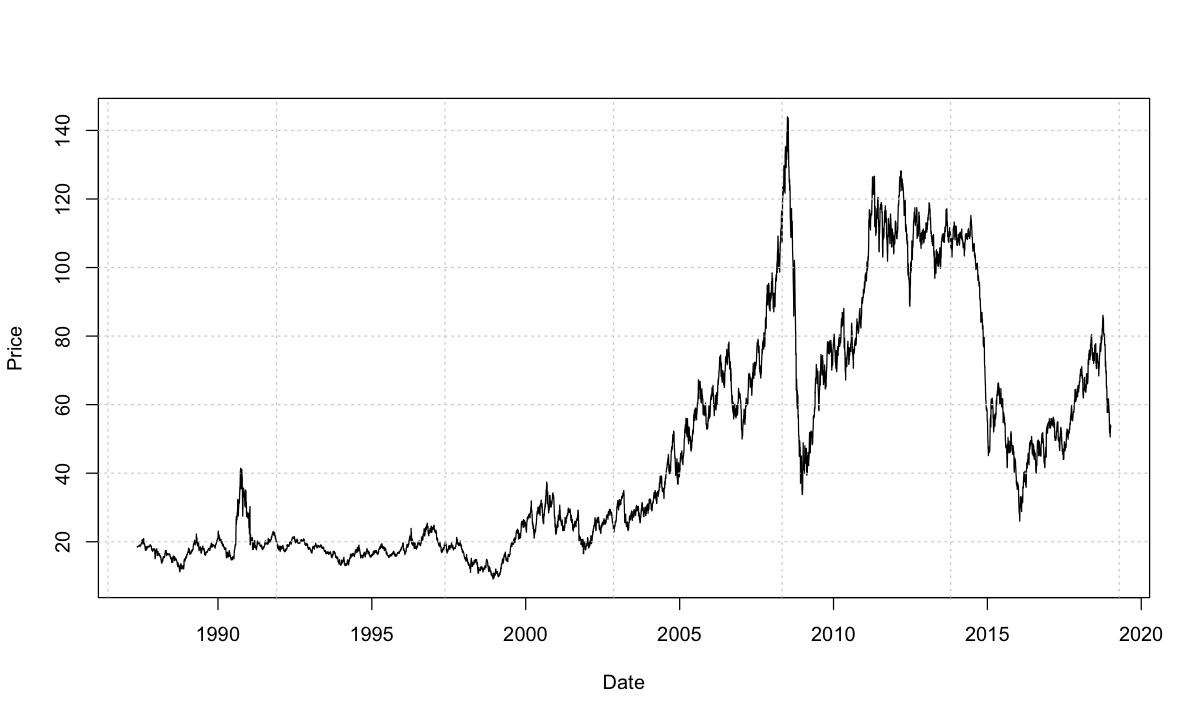

In [196]:
options(repr.plot.width=10, repr.plot.height=6)
with(df_brent,plot(x = Date,y = Price,type = 'l'))
grid()

In [197]:
#Serie WTI

df_wti<-read_csv(file = 'https://raw.githubusercontent.com/datasets/oil-prices/master/data/wti-daily.csv', col_names = TRUE,cols(
  Date = col_date(format = ""),
  Price = col_double()
))

str(df_wti)

summary(df_wti)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	8321 obs. of  2 variables:
 $ Date : Date, format: "1986-01-02" "1986-01-03" ...
 $ Price: num  25.6 26 26.5 25.9 25.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_date(format = ""),
  ..   Price = col_double()
  .. )


      Date                Price       
 Min.   :1986-01-02   Min.   : 10.25  
 1st Qu.:1994-03-02   1st Qu.: 19.61  
 Median :2002-06-11   Median : 30.02  
 Mean   :2002-06-17   Mean   : 43.77  
 3rd Qu.:2010-09-27   3rd Qu.: 64.26  
 Max.   :2019-01-03   Max.   :145.31  

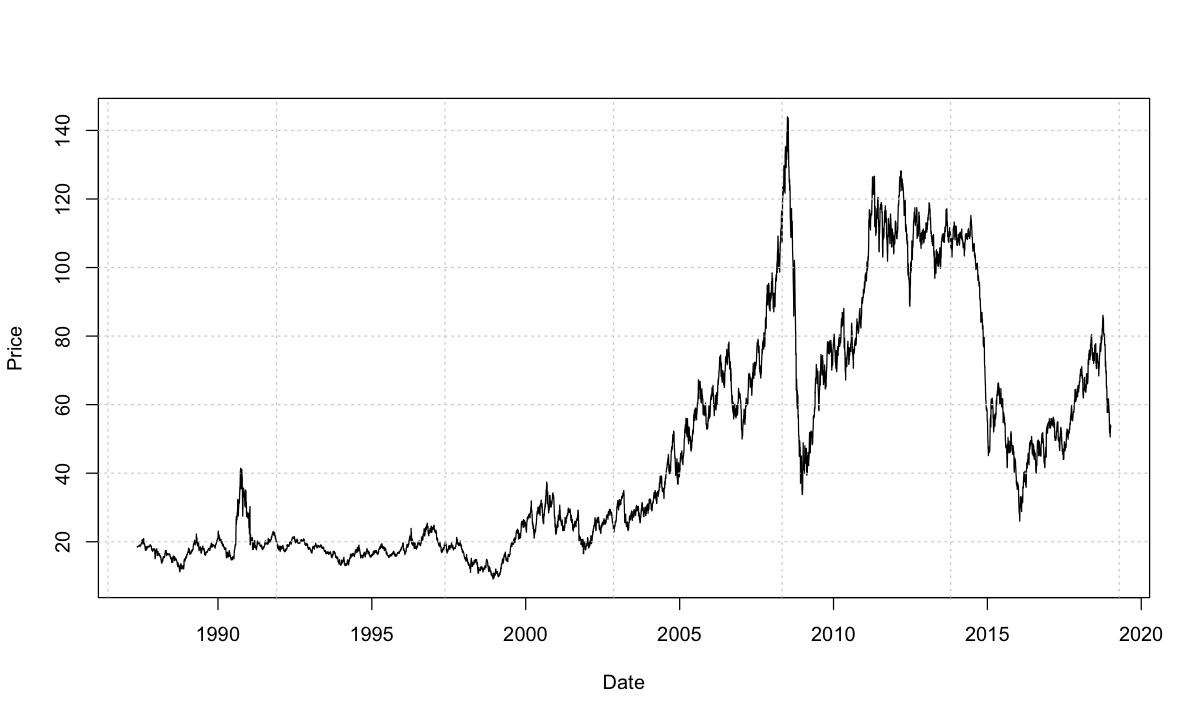

In [198]:
options(repr.plot.width=10, repr.plot.height=6)
with(df_brent,plot(x = Date,y = Price,type = 'l'))
grid()

In [199]:
#Dado que las series tienen diferentes fechas se debe homologar los datos con una funcion
homologar_fechas<-function(df, fecha_inicial, fecha_final){
    df<-df%>%filter(Date>=fecha_inicial)%>%filter(Date<=fecha_final)
    return(df)
}

In [200]:
df_brent<-homologar_fechas(df = df_brent,fecha_inicial = '2007-01-01',fecha_final = '2018-12-31')
df_wti<-homologar_fechas(df = df_wti,fecha_inicial = '2007-01-01',fecha_final = '2018-12-31')

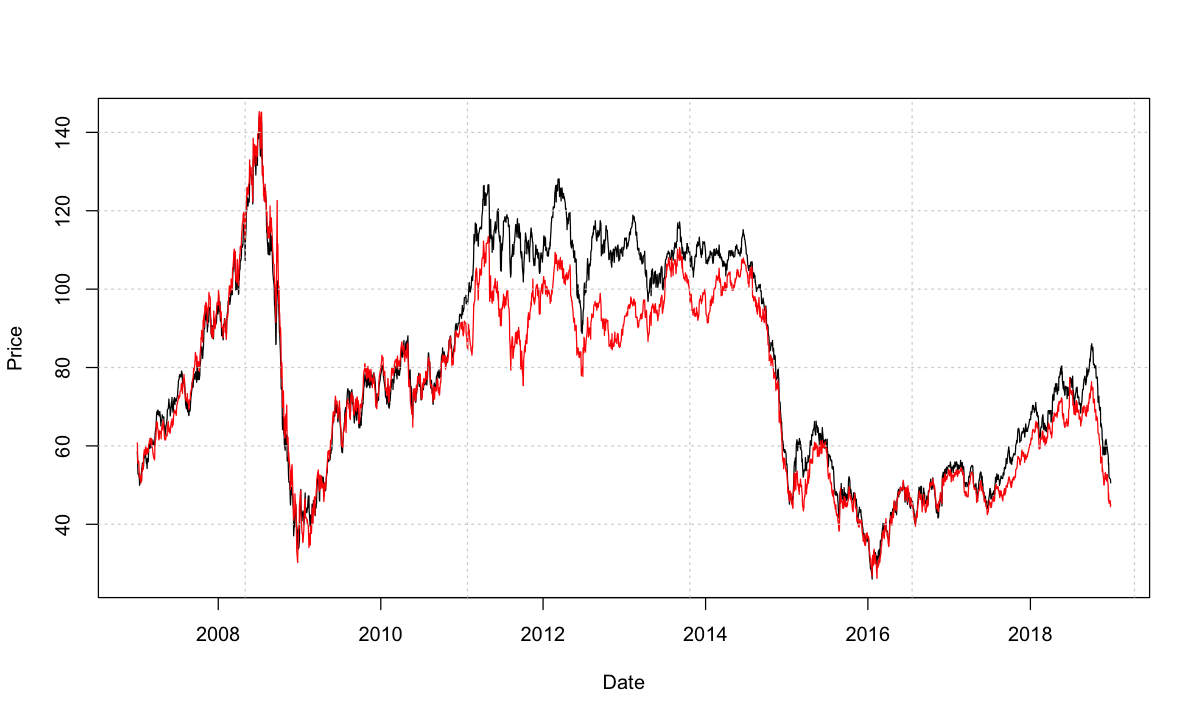

In [201]:
plot(df_brent,type = 'l')
lines(df_wti,col='red')
grid()

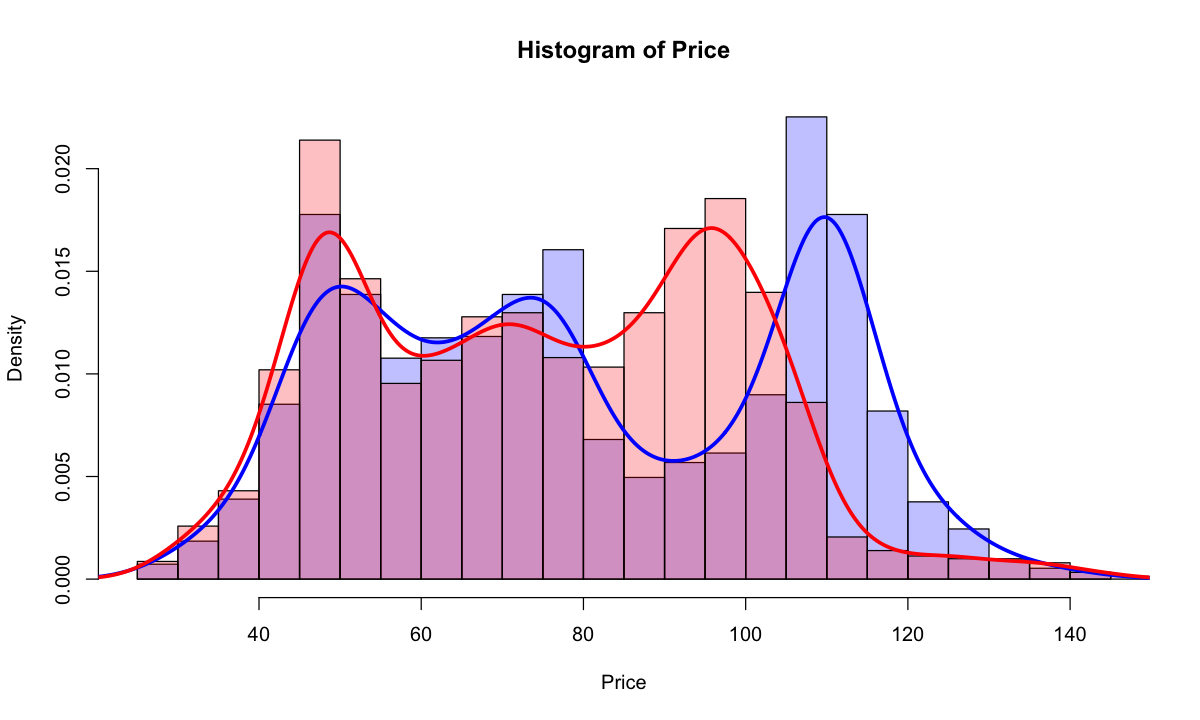

In [202]:
p1<-with(df_brent,hist(Price,breaks = 30, col = rgb(0,0,1,1/4),probability = TRUE))
p2<-with(df_wti,hist(Price,breaks = 30, add = T,col = rgb(1,0,0,1/4),probability = TRUE))

lines(density(df_brent$Price),col = 'blue',lwd=3)
lines(density(df_wti$Price),col = 'red',lwd=3)

In [203]:
#Crear un dataframe con los datos

length(df_brent$Price)
length(df_wti$Price)

[1] 3028

[1] 3020

# Para unir dos tablas, se debe emplear las funcion merge

_merge( x = df1, <br />
       y = df2, <br />
       all = TRUE/FALSE, # si TRUE, full join, si FALSE, inner join <br /> 
       by.x = campo similar del dataframe x, <br />
       by.y = campo similar del dataframe y, <br />
       all.x = TRUE/FALSE, # Esto es un left join <br />
       all.y = TRUE/FALSE) # Esto es un rigth join_ <br />

<img src="join.png" width=900>

In [204]:
# Left join de los datos
df<-merge(df_brent,df_wti,all.x = TRUE,by = 'Date')

In [205]:
# Imputacion de valores faltantes con el promedio de la serie
df$Price.y[!complete.cases(df$Price.y)]<-mean(df$Price.y,na.rm = TRUE)

colnames(df)<-c('Date','precios_brent','precios_wti')

# Obtener los precios promedios mensuales

Para obtener los precios mensuales, se debe utilizar la libreria _dplyr_

** Pasos para resumir datos **

|Accion|Funcion|
|------|-------|
|1. Ordenar los datos de la tabla| Arrange()|
|2. Crear la columna de agrupacion (En este caso, AAAA-MM para agrupar por año-mes)| mutate(ano_mes = |
|3. Agrupar por la nueva columna | group_by()|
|4. Crear columnas resumen| summarize(precios_mensuales_brent = mean(precios_brent), precios_mensuales_wti = mean(precios_wti)

#### Nota: Recuerde utilizar el pipeline de dplyr %>% (se puede interpretar como la palabra:  _luego_

In [206]:
head(df)

Date,precios_brent,precios_wti
2007-01-02,58.49,60.77
2007-01-03,56.63,58.31
2007-01-04,54.58,55.65
2007-01-05,52.82,56.29
2007-01-08,52.82,56.08
2007-01-09,52.38,55.65


In [207]:
df_mensuales<-df%>%
    mutate(ano_mes =paste0( str_sub(Date,start = 1,end = 7),'-01'))%>% #Crea una fecha estandar para indicar el ano_mes
    arrange(ano_mes)%>%                                                #ordena el dataframe por ano_mes
    group_by(ano_mes)%>%                                               #Agrupa los datos por ano_mes
    summarize(prom_brent = mean(precios_brent),                        #Resume los datos aplicando promedio
              prom_wti = mean(precios_wti))                            #



In [208]:
str(df_mensuales)   # Veamos la estructura final de dataframe ... se observan problemas con el campo ano_mes
df_mensuales$ano_mes <- as.Date(df_mensuales$ano_mes,format = '%Y-%m-%d')
str(df_mensuales)   # Veamos como queda corregido ... ok!!

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	144 obs. of  3 variables:
 $ ano_mes   : chr  "2007-01-01" "2007-02-01" "2007-03-01" "2007-04-01" ...
 $ prom_brent: num  53.7 57.6 62.1 67.5 67.2 ...
 $ prom_wti  : num  54.5 59.3 60.4 64.1 63.5 ...
Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	144 obs. of  3 variables:
 $ ano_mes   : Date, format: "2007-01-01" "2007-02-01" ...
 $ prom_brent: num  53.7 57.6 62.1 67.5 67.2 ...
 $ prom_wti  : num  54.5 59.3 60.4 64.1 63.5 ...


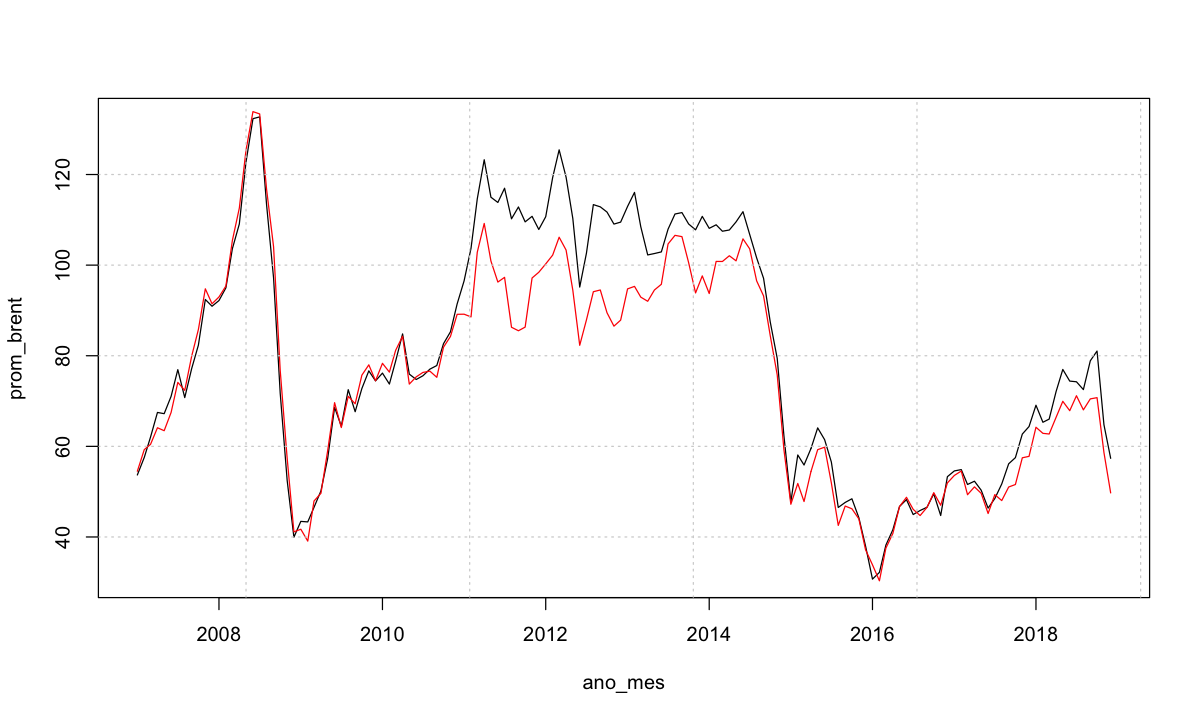

In [209]:
with(df_mensuales,plot(x = ano_mes,y = prom_brent, type='l'))
lines(x = df_mensuales$ano_mes,df_mensuales$prom_wti,col = 'red',type = 'l')
grid()

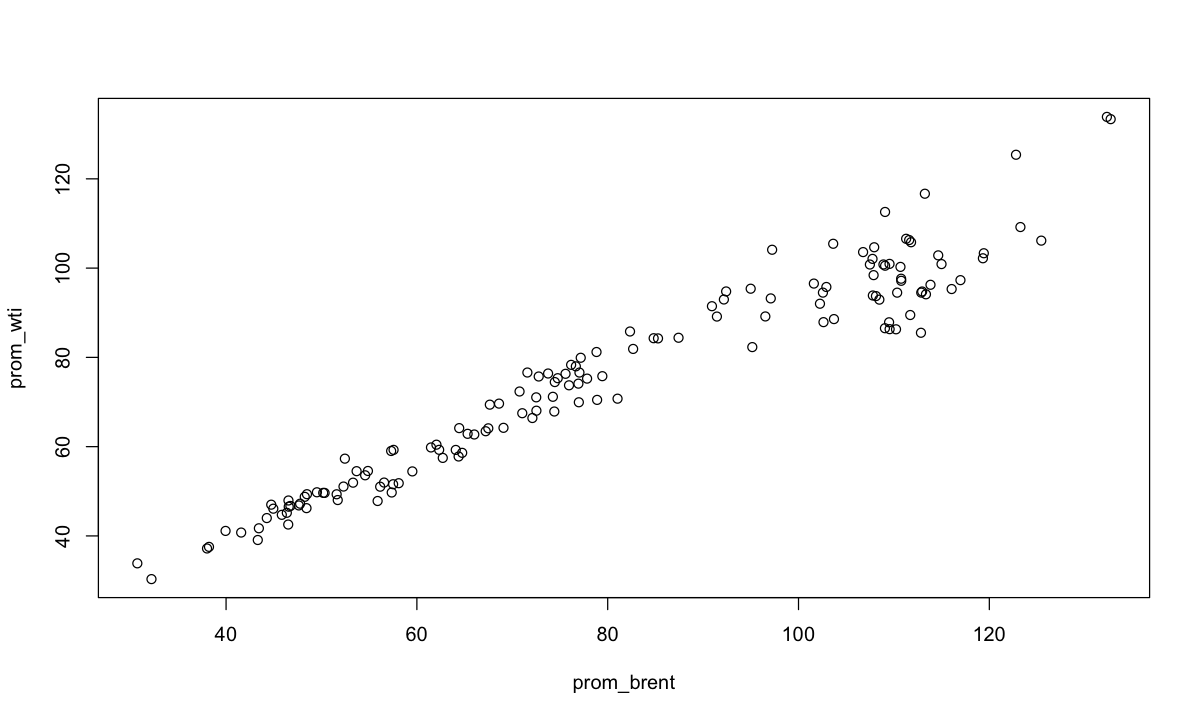

In [210]:
with(df_mensuales,plot(x = prom_brent,y = prom_wti, type='p'))


In [211]:
summary(df_mensuales[,2:3])

   prom_brent        prom_wti     
 Min.   : 30.70   Min.   : 30.32  
 1st Qu.: 57.12   1st Qu.: 54.23  
 Median : 76.41   Median : 75.53  
 Mean   : 80.17   Mean   : 75.20  
 3rd Qu.:107.89   3rd Qu.: 94.51  
 Max.   :132.72   Max.   :133.88  

# Taller:


* Precios mensuales mensuales del oro https://github.com/datasets/gold-prices/blob/master/data/monthly.csv
* Indice de precios al consumidor (mensuales), indice S&P500 (mensuales) https://github.com/datasets/s-and-p-500/blob/master/data/data.csv



1. Cree una funcion que lea los archivos mensuales sin descargarlos de la fuente
2. Utilice la funcion para leer los dos links entregados arriba
3. Describir los dataframes, identificar tipos de datos, corregir campos con tipo de dato equivocado
4. Existen datos NA, corregir si es necesario utilizando el promedio
5. Cual es la distribucion de la serie del oro vs la serie del S&P500
6. Unir las tablas con resolucion mensual
7. Calcular la correlacion de Pearson con las 3 series
8. Agregar los datos de forma anual utilizando el promedio 
9. Guarde un archivo de excel con los datos agregados de forma anual.
10. Envie el excel al correo jcgaviriao@unal.edu.co

